# Image Captioning using Deep Learning: Assignment-3

*  In this assignment, we will use CNNs in [PyTorch](https://pytorch.org/docs/stable/index.html) for image classification.

* We have been using MNIST by flattening 28$\times$28 images to 784-sized vectors.

* This time, we will classify images from the CIFAR-10 dataset - dimension is 32$\times$32.

* Much of this notebook remains the same as for Assignment 2, just minor changes would be needed and this assignment won't take long.

**Feel free to redefine any pre-written cells below, just make sure to properly explain your work in Markdown and don't change the dataset**

## Import libraries here
PyTorch, NumPy, Matplotlib, ...
Even when equipped with PyTorch, NumPy and Matplotlib make your work easier for visualization etc.

Note the following method to **initialize the seed** for reproducibility of results, both for NumPy & PyTorch (CPU/CUDA).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import random

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def set_seed(seed=42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    # np.random.seed(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # # When running on the CuDNN backend, two further options must be set
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False
    # # Set a fixed value for the hash seed
    # os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed(42)

## Load *Dataset*
**DON'T CHANGE THIS CODE**.

In [3]:
import torchvision
from torchvision import transforms, datasets

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_path = './'

train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


# Your Code from here...

In [4]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(train, [45000,5000])

from torch.utils.data import DataLoader
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

In [ ]:
# load the data set

# X = pass
# y = pass


# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library



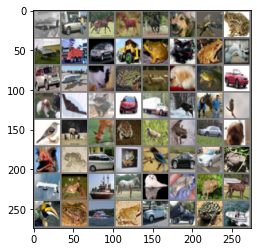

0 1 7 4 7 5 2 6 0 9 1 9 6 3 6 7


In [5]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
batch_size=16
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]}' for j in range(batch_size)))


## Creating a Dataset Class


In [6]:
# define your dataset class

classes = {0:'airplane',  1:'truck', 2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'car'}






## ```nn.Module``` for your model
In this segment, define a class for your model, it has to inherit from the ```nn.Module``` class. You must define two functions here - ```__init__``` and ```forward```, again pretty self-explanatory. Helper functions can also be implemented, your choice!

Look into the following ```torch``` layers beyond those you used in the second assignment and combine them to form your network, you can find more [here](https://pytorch.org/docs/stable/nn.html) -
- [```nn.Conv2d```](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [```nn.BatchNorm2d```](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)


In [7]:
from torch.nn.modules.conv import Conv2d
# define a child class of nn.Module for your model
# specify the architecture here itself
import torch.nn as nn
import torch.nn.functional as F
class Imageclasssifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    return self.fc3(x)


clf =Imageclasssifier()


## Training loop
You can write a training loop but usually writing it within a function helps so that you can train in multiple passes with just one function call if you still don't see convergence of the loss. ```display_step``` is for you to display results on the validation set (which you must not have trained upon).

You will need to use ```zero_grad()```, ```backward()``` and multiple such functions here. Look for them in the tutorials given.

In [13]:
import torch.optim as optim


def train(model, optimizer, criterion, train_loader, display_step=None):
    for epoch in range(15):
        
        for data in train_loader:
            xdt,ydt=data
            yhat=model(xdt)
            loss=criterion(yhat,ydt)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    print(f"Epoch{epoch} loss is{loss.item()}")

## Prediction & Accuracy
Prediction function should predict outputs using your trained model for a given **NumPy array** ```X_test``` and the output should be another **NumPy array**.

The accuracy function would be the same as before.

In [14]:
def predict(model, X_test):
    x_tensor=torch.from_numpy(X_test)
    outputs = model(x_tensor)
    value,pred = torch.max(outputs, 1)
    pred=pred.data
    return pred.numpy()

In [15]:
def accuracy(pred, labels):
    total=0
    correct=0
    
    
    
    total += labels.size(0)
    correct += torch.sum(pred == labels)

    return 100 * correct // total

## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.001, momentum=0.9)



train(clf, optimizer, criterion, train_loader, display_step=None)

Epoch14 loss is1.3765761852264404


## Run your model for the validation dataset
Use your trained model to get predictions for the validation dataset you split earlier.

In [17]:
for data in val_loader:
    x,label=data
    a=predict(clf,x.numpy())
    
    print(accuracy(torch.from_numpy(a),label))
    #print(a)

tensor(60)
tensor(54)
tensor(51)
tensor(54)
tensor(65)
tensor(57)
tensor(51)
tensor(71)
tensor(68)
tensor(51)
tensor(60)
tensor(59)
tensor(59)
tensor(59)
tensor(56)
tensor(67)
tensor(46)
tensor(54)
tensor(56)
tensor(60)
tensor(64)
tensor(54)
tensor(64)
tensor(62)
tensor(57)
tensor(57)
tensor(56)
tensor(56)
tensor(56)
tensor(65)
tensor(54)
tensor(54)
tensor(67)
tensor(60)
tensor(56)
tensor(62)
tensor(43)
tensor(50)
tensor(57)
tensor(65)
tensor(56)
tensor(51)
tensor(57)
tensor(60)
tensor(64)
tensor(62)
tensor(60)
tensor(59)
tensor(53)
tensor(45)
tensor(46)
tensor(56)
tensor(67)
tensor(62)
tensor(51)
tensor(67)
tensor(59)
tensor(53)
tensor(57)
tensor(51)
tensor(53)
tensor(60)
tensor(60)
tensor(48)
tensor(57)
tensor(62)
tensor(51)
tensor(51)
tensor(50)
tensor(64)
tensor(43)
tensor(67)
tensor(43)
tensor(54)
tensor(54)
tensor(59)
tensor(71)
tensor(60)
tensor(87)


## Submission
To submit your solution, you will need to make a file with name ```model.py``` containing imports necessary to write the model class and the model class itself. It shouldn't do anything else when run. Other than this, save the trained model in a file named ```ass_3.pt```. When you are done with the assignment, commit the updated notebook, the ```model.py``` class file and the ```ass_3.pt``` model-weights file to the repository.

In [ ]:
from google.colab import files
torch.save(final_model, 'ass_3.pt')
files.download('ass_3.pt') # download the file from the Colab session for submission

NameError: ignored

Check if it got saved right!

In [ ]:
# load the model, use predict function
